<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/xgboost_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv("./train.csv")
y = train_data.y.values
train_data = train_data.drop(["id", "y", "contact","job", "education"], axis=1)

# contact
# job
# poutcome
# loan


train_data["default"] = train_data["default"].map(dict(no=0, yes=1)).astype('int64')
train_data["housing"] = train_data["housing"].map(dict(no=0, yes=1)).astype('int64')
train_data["loan"] = train_data["loan"].map(dict(no=0, yes=1)).astype('int64')
train_data["month"] = train_data["month"].map(dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6, jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)).astype('int64')
# X = pd.get_dummies(train_data ,columns=['job', "marital", "education", "contact", "poutcome"])
X = pd.get_dummies(train_data ,columns=["marital", "poutcome"])





train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True) 
train_x

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
22122,31,0,12727,0,1,8,7,158,4,359,0,0,1,0,0,0,0,1
8183,35,0,66437,1,0,20,5,87,3,772,1,0,1,0,1,0,0,0
26713,30,0,95476,0,0,18,8,158,3,870,0,0,1,0,0,0,0,1
7138,32,0,40323,1,0,3,2,158,1,340,0,0,0,1,0,0,0,1
7686,30,0,746,1,0,4,11,189,1,38,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,35,0,34963,1,0,27,5,121,4,299,0,1,0,0,0,0,0,1
8377,40,0,81172,1,0,3,2,826,1,4,0,0,1,0,0,0,0,1
12121,42,0,88659,0,0,17,7,177,1,464,0,0,1,0,0,0,0,1
24956,32,0,76187,0,0,3,2,14,1,21,0,0,0,1,0,0,0,1


In [26]:
# グリッドサーチ
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
    "eta": [0.1, 0.2, 0.3],
    "gamma": [0, 0.1],
    "n_estimators": [10, 100],
    "max_depth": [2, 4, 6, 8],
    "min_child_weigh": [1, 2],
    "nthread": [2]
}


model = xgb.XGBClassifier()  
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params,   
                    cv=skf, scoring="roc_auc", n_jobs=1, verbose=3)  
clf.fit(train_x, train_y)  

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.731, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.767, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.769, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.755, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.758, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.833, total=   0.6s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.833, total=   0.6s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, m

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logi...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'eta': [0.1, 0.2, 0.3], 'gamma': [0, 0.1],
                         'max_depth': [2, 4, 6

In [19]:
print("Best score: %.4f" % (clf.best_score_))  
print(clf.best_params_) 
model = clf.best_estimator_ 

Best score: 0.8395
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 4, 'min_child_weigh': 1, 'n_estimators': 100, 'nthread': 2}


In [12]:

dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(test_x, label=test_y)

param = {'max_depth': 4, 
    'eta': 0.1, 
    'gamma': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     'min_child_weigh': 1, 
     'n_estimators': 100,
     'nthread': 2
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 10000  
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5) 

[0]	eval-auc:0.76293	train-auc:0.775233
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[1]	eval-auc:0.763945	train-auc:0.781911
[2]	eval-auc:0.773593	train-auc:0.793725
[3]	eval-auc:0.775485	train-auc:0.793466
[4]	eval-auc:0.781266	train-auc:0.794609
[5]	eval-auc:0.785646	train-auc:0.800784
[6]	eval-auc:0.78538	train-auc:0.800813
[7]	eval-auc:0.786302	train-auc:0.801398
[8]	eval-auc:0.786167	train-auc:0.801158
[9]	eval-auc:0.788702	train-auc:0.804875
[10]	eval-auc:0.788827	train-auc:0.804949
[11]	eval-auc:0.790164	train-auc:0.806301
[12]	eval-auc:0.790201	train-auc:0.806422
[13]	eval-auc:0.791185	train-auc:0.807936
[14]	eval-auc:0.79127	train-auc:0.807759
[15]	eval-auc:0.7905	train-auc:0.807175
[16]	eval-auc:0.791749	train-auc:0.811137
[17]	eval-auc:0.793608	train-auc:0.812264
[18]	eval-auc:0.797421	train-auc:0.814034
[19]	eval-auc:0.799673	train-auc:0.815124
[20]	eval-auc:0.803386	train-auc:

In [13]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit)) 

Best Score:0.9975, Iteratin:1806, Ntree_Limit:1807


In [14]:

print(sorted(bst.get_score(), key=bst.get_score().get))
bst.get_score()

# contact
# job
# poutcome
# loan



['job_student', 'education_unknown', 'job_unemployed', 'job_entrepreneur', 'poutcome_unknown', 'job_retired', 'job_housemaid', 'marital_divorced', 'poutcome_other', 'job_self-employed', 'education_primary', 'loan', 'job_technician', 'job_admin.', 'poutcome_success', 'job_services', 'education_tertiary', 'job_blue-collar', 'poutcome_failure', 'marital_single', 'job_management', 'education_secondary', 'marital_married', 'previous', 'housing', 'campaign', 'month', 'age', 'duration', 'day', 'pdays', 'balance']


{'age': 1832,
 'balance': 6181,
 'campaign': 603,
 'day': 2001,
 'duration': 1933,
 'education_primary': 108,
 'education_secondary': 210,
 'education_tertiary': 159,
 'education_unknown': 64,
 'housing': 304,
 'job_admin.': 145,
 'job_blue-collar': 169,
 'job_entrepreneur': 70,
 'job_housemaid': 93,
 'job_management': 194,
 'job_retired': 86,
 'job_self-employed': 103,
 'job_services': 158,
 'job_student': 52,
 'job_technician': 141,
 'job_unemployed': 64,
 'loan': 131,
 'marital_divorced': 99,
 'marital_married': 234,
 'marital_single': 183,
 'month': 1167,
 'pdays': 4605,
 'poutcome_failure': 173,
 'poutcome_other': 101,
 'poutcome_success': 151,
 'poutcome_unknown': 79,
 'previous': 294}

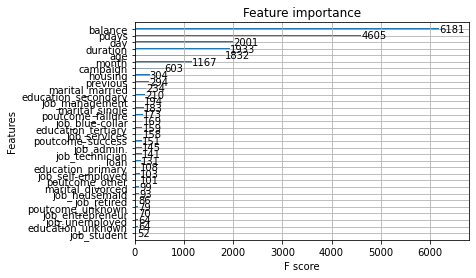

In [27]:
xgb.plot_importance(bst)  